In [1]:
import pandas as pd
import filter_data
import imp
import chunk_filtering
import matplotlib.pyplot as plt
import seaborn as sns
imp.reload(filter_data)
imp.reload(chunk_filtering)

d:\Ben\Program Files\WPy64-3720\python-3.7.2.amd64\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


<module 'chunk_filtering' from 'd:\\Ben\\FinalDSProj\\chunk_filtering.py'>

In [9]:
df_patients = pd.read_csv("filtered\\filtered_patients.csv")
df_icu_stays = pd.read_csv("filtered\\filtered_icustays.csv")

In [20]:
unique_subject_ids = df_patients["subject_id"].unique()
len(unique_subject_ids)
# df_patients.groupby(by='long_title').count().sort_values(by='subject_id', ascending=False)

12872

In [22]:
unique_subject_ids_icu = df_icu_stays["subject_id"].unique()
len(unique_subject_ids_icu)

10025

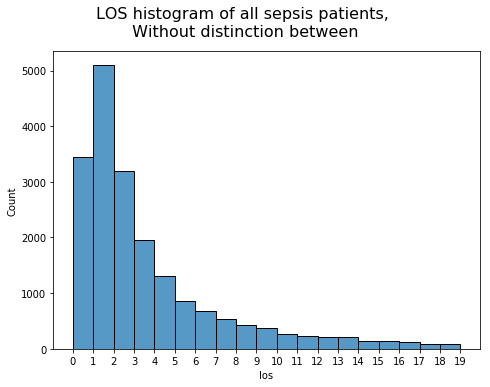

In [31]:
# plot histogram of all sepsis patients
plt.rcParams["figure.figsize"] = (8,6)
sns.histplot(df_icu_stays["los"], bins=range(0,20,1))
plt.suptitle("LOS histogram of all sepsis patients, \n Without distinction between ", fontsize=16)
plt.tight_layout(pad=5)
plt.xticks(range(0,20,1))
plt.savefig("all_sepsis_los_hist.png", pad_inches=0.1)

In [33]:
df_icu_stays["los"].describe()
df_icu_stays["los"].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

count    20153.000000
mean         4.722414
std          7.283238
min          0.001447
10%          0.786273
20%          1.090338
30%          1.503419
40%          1.913650
50%          2.404549
60%          3.125748
70%          4.258882
80%          6.372882
90%         11.071657
max        375.944560
Name: los, dtype: float64

In [122]:
df_above_3 = df_icu_stays[df_icu_stays["los"] >= 3]
df_above_1 = df_icu_stays[df_icu_stays["los"] >= 1]
sids_above_3_unique = df_above_3["subject_id"].unique()
sids_above_1_unique = df_above_1["subject_id"].unique()
df_above_3["subject_id"].nunique()

5746

In [37]:
df_above_3.shape[0] - df_above_3["subject_id"].nunique()

2673

In [38]:
df_labevents = pd.read_csv("filtered\\filtered_labevents.csv")

C:\Users\Bengo\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3524: DtypeWarning: Columns (9,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [45]:
# mean lactate samples per patient
df_labevents.groupby(by='subject_id').count()['labevent_id'].describe()

count    12734.000000
mean        25.633894
std         42.637826
min          1.000000
25%          5.000000
50%         13.000000
75%         28.000000
max        648.000000
Name: labevent_id, dtype: float64

In [47]:
unique_subject_ids_labs = df_labevents["subject_id"].unique()
len(unique_subject_ids_labs)

12734

In [57]:
df_labevents.groupby(by='itemid_label').count()['labevent_id']

itemid_label
Lactate                           178314
Lactate Dehydrogenase (LD)        143864
Lactate Dehydrogenase, Ascites      1425
Lactate Dehydrogenase, CSF           425
Lactate Dehydrogenase, Pleural      2394
Name: labevent_id, dtype: int64

In [66]:
df_procedures = pd.read_csv("filtered\\filtered_procedureevents.csv")
overall_unique_proc_sid = df_procedures["subject_id"].nunique()

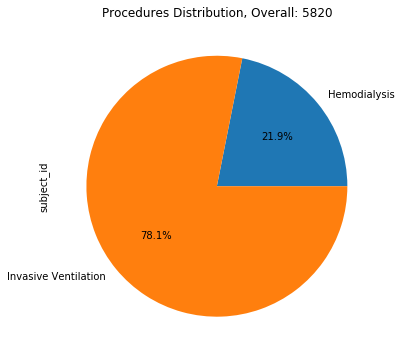

In [68]:
pie_procedures = df_procedures.groupby('itemid_label').count()['subject_id'].plot.pie(autopct='%1.1f%%')
plt.title("Procedures Distribution, Overall: {}".format(overall_unique_proc_sid))
plt.savefig("procedures_distribution.png", pad_inches=0.1)

In [125]:
df_input_events = pd.read_csv("filtered\\input_events_filtered_by_subject_id_and_medicine.csv")
df_input_events['itemid_label' == 'metaraminol']

KeyError: False

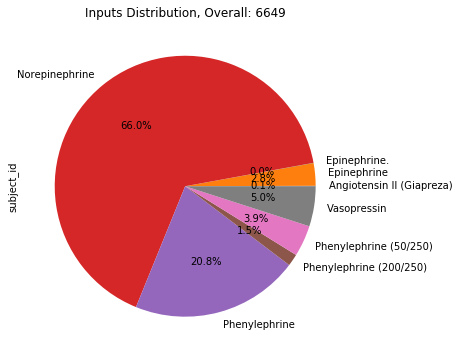

In [74]:
overall_unique_input_sid = df_input_events["subject_id"].nunique()
inputs_pie = df_input_events.groupby('itemid_label').count()['subject_id'].plot.pie(autopct='%1.1f%%')
plt.title("Inputs Distribution, Overall: {}".format(overall_unique_input_sid))
plt.savefig("inputs_distribution.png", pad_inches=0.1)

In [97]:
sids_nor_adernaline = df_input_events[df_input_events["itemid_label"] == "Norepinephrine"]["subject_id"].unique()
# sids_above_3_unique
sids_below_60_unique = df_patients[df_patients['anchor_age'] <= 60]["subject_id"].unique()
intersect_sids = set(sids_above_3_unique).intersection(sids_below_60_unique).intersection(sids_nor_adernaline)
# intersect_sids
len(intersect_sids)
# sids_below_60_unique[]

1547

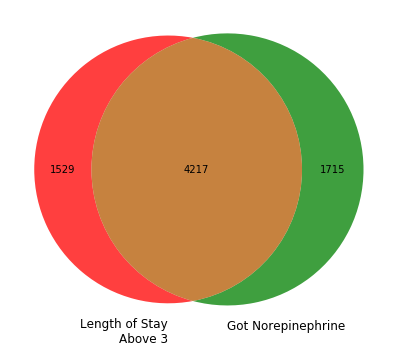

In [118]:
from matplotlib_venn import venn2
venn2([set(sids_above_3_unique), set(sids_nor_adernaline)]  ,
     set_labels=('Length of Stay\nAbove 3', 'Got Norepinephrine'), alpha=0.75)


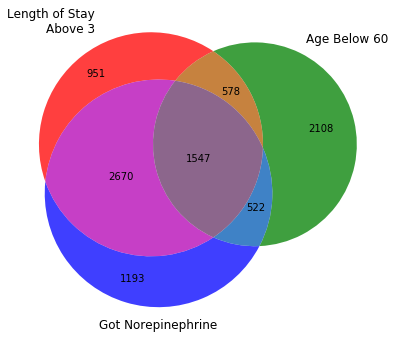

In [109]:
from matplotlib_venn import venn3
venn3([set(sids_above_3_unique), set(sids_below_60_unique), set(sids_nor_adernaline)]  ,
     set_labels=('Length of Stay\nAbove 3', 'Age Below 60', 'Got Norepinephrine'), alpha=0.75)


In [117]:
df_alive_subjects = pd.read_csv("alive_subject_ids.csv")
alives_sids = df_alive_subjects.subject_id.unique()

intersected_alive = intersect_sids.intersection(alives_sids)
len(intersected_alive)

972

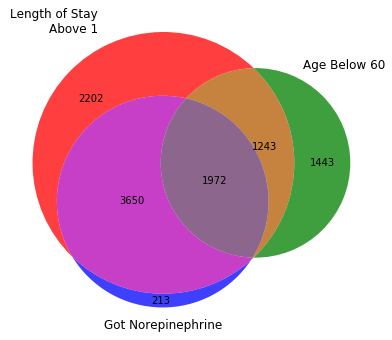

In [123]:
from matplotlib_venn import venn3
venn3([set(sids_above_1_unique), set(sids_below_60_unique), set(sids_nor_adernaline)]  ,
     set_labels=('Length of Stay\nAbove 1', 'Age Below 60', 'Got Norepinephrine'), alpha=0.75)
